# Data Preparation and Cleaning

In [204]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [205]:
# Load data 
df = pd.read_excel('PRNS_Activities 2013-2015.xlsx', sheet_name=None)
df = pd.concat((df[i] for i in df.keys()), sort=False)

In [206]:
# Explore data
df.head()

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,EndingTime,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Fees,Day(s)
0,251.2.0707,Arthritis Exercise Program,Fall 2015,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-08-06,2015-08-31,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,NaN,NaN
1,251.2.1800,Arthritis Exercise Program,Fall 2015,Closed,Active Adults (50+) Classes,Almaden Community Center,13,2015-09-03,2015-10-01,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,NaN,NaN
2,251.2.1801,Arthritis Exercise Program,Fall 2015,Closed,Active Adults (50+) Classes,Almaden Community Center,9,2015-10-05,2015-11-05,13:30:00,14:30:00,50,0,M Th,9.0,9,37.0,NaN,NaN
3,251.2.1802,Arthritis Exercise Program,Fall 2015,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-11-09,2015-12-07,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,NaN,NaN
4,251.2.1814,Bridge Intermediate Class,Fall 2015,Closed,Active Adults (50+) Classes,Almaden Community Center,17,2015-09-01,2015-10-20,13:00:00,15:00:00,50,0,Tu,16.0,8,36.0,NaN,NaN


In [207]:
# Over 11,000 observations and 19 features.
df.shape

(11174, 19)

In [208]:
# A few of the features are duplicates so we'll have to consolidate and remove any remaining missing values. 
df.isnull().sum()

ActivityNumber         0
ActivityName           0
SeasonName             0
Status                 0
CategoryName           0
Community Center       0
NumberEnrolled         0
BeginningDate          0
EndingDate             0
StartingTime           0
EndingTime             0
Minimum Age            0
Maximum Age            0
WeekDays            4043
NumberOfHours          0
NumberOfDates          0
Fee                 2843
Fees                8331
Day(s)              7131
dtype: int64

In [209]:
# WeekDays and Day(s) can be combined.
df.WeekDays.unique()

array(['M Th', 'Tu', 'Tu Th', 'F', 'M', 'W', 'Th', 'M W F', 'W F',
       'W Th F', 'Tu F', 'Sa', 'M W', 'M Tu W Th F', 'M Tu W',
       'Tu W Th F', 'Tu W Th', 'Su', 'M Th Sa', 'Th F', 'M Tu W Th',
       'Every day', 'Th F Sa', 'M W Th F', 'Su F Sa', 'F Sa', 'Th Sa',
       'Tu Sa', 'M Tu', 'M F', 'Tu W', 'M Th F', nan], dtype=object)

In [210]:
df['Day(s)'].unique()

array([nan, 'F', 'W F', 'Tu', 'Tu Th', 'M', 'Sa', 'Th', 'W', 'M W F',
       'M Th', 'Tu W', 'Th F', 'M W', 'Tu F', 'M Tu W Th F', 'Tu W Th',
       'Tu W Th F', 'M Tu Th F', 'M Tu W Th', 'M Th Sa', 'Su',
       'Every day', 'M Tu W F', 'M W Th F', 'W Th F'], dtype=object)

In [211]:
df['WeekDays'] = df['WeekDays'].fillna(df['Day(s)'])

In [212]:
# So can Fee and Fees.
df['Fee'] = df['Fee'].fillna(df['Fees'])

In [213]:
# The only missing values are in features we consolidated so those can be removed.
df.isnull().sum()

ActivityNumber         0
ActivityName           0
SeasonName             0
Status                 0
CategoryName           0
Community Center       0
NumberEnrolled         0
BeginningDate          0
EndingDate             0
StartingTime           0
EndingTime             0
Minimum Age            0
Maximum Age            0
WeekDays               0
NumberOfHours          0
NumberOfDates          0
Fee                    0
Fees                8331
Day(s)              7131
dtype: int64

In [214]:
df.pop('Fees')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
4013   NaN
4014   NaN
4015   NaN
4016   NaN
4017   NaN
4018   NaN
4019   NaN
4020   NaN
4021   NaN
4022   NaN
4023   NaN
4024   NaN
4025   NaN
4026   NaN
4027   NaN
4028   NaN
4029   NaN
4030   NaN
4031   NaN
4032   NaN
4033   NaN
4034   NaN
4035   NaN
4036   NaN
4037   NaN
4038   NaN
4039   NaN
4040   NaN
4041   NaN
4042   NaN
Name: Fees, Length: 11174, dtype: float64

In [215]:
df.pop('Day(s)')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
4013      W
4014     Sa
4015     Tu
4016      W
4017      W
4018     Tu
4019      W
4020      W
4021     Sa
4022     Sa
4023     Sa
4024     Sa
4025      M
4026      M
4027     Sa
4028     Th
4029      M
4030      M
4031     Sa
4032     Th
4033     Th
4034     Th
4035     Th
4036      M
4037     Sa
4038     Th
4039     Th
4040      M
4041     Th
4042     Sa
Name: Day(s), Length: 11174, dtype: object

In [216]:
# No null observations left
df.isnull().sum()

ActivityNumber      0
ActivityName        0
SeasonName          0
Status              0
CategoryName        0
Community Center    0
NumberEnrolled      0
BeginningDate       0
EndingDate          0
StartingTime        0
EndingTime          0
Minimum Age         0
Maximum Age         0
WeekDays            0
NumberOfHours       0
NumberOfDates       0
Fee                 0
dtype: int64

In [217]:
# Create a feature for year.
year = df["SeasonName"].str.split(" ", n = 1, expand = True)

In [218]:
year.head()

,0,1
0,Fall,2015
1,Fall,2015
2,Fall,2015
3,Fall,2015
4,Fall,2015


In [219]:
df["SeasonName"] = year[0]
df["Year"] = year[1]

In [220]:
df.head()

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,EndingTime,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Year
0,251.2.0707,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-08-06,2015-08-31,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015
1,251.2.1800,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,13,2015-09-03,2015-10-01,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015
2,251.2.1801,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,9,2015-10-05,2015-11-05,13:30:00,14:30:00,50,0,M Th,9.0,9,37.0,2015
3,251.2.1802,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-11-09,2015-12-07,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015
4,251.2.1814,Bridge Intermediate Class,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,17,2015-09-01,2015-10-20,13:00:00,15:00:00,50,0,Tu,16.0,8,36.0,2015


In [221]:
df.describe()

,NumberEnrolled,Minimum Age,Maximum Age,NumberOfHours,NumberOfDates,Fee
count,11174.000000,11174.000000,11174.000000,11174.000000,11174.000000,11174.000000
mean,10.558529,15.269733,14.001790,12.618832,6.468140,101.568597
std,13.224542,18.319550,24.437962,16.196442,5.124566,88.282225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,4.000000,4.000000,37.000000
50%,7.000000,6.000000,8.000000,6.750000,6.000000,90.000000
75%,14.000000,16.000000,12.000000,15.000000,8.000000,131.000000
max,165.000000,55.000000,100.000000,167.883000,60.000000,921.000000


In [222]:
df.shape

(11174, 18)

In [223]:
df.columns

Index(['ActivityNumber', 'ActivityName', 'SeasonName', 'Status',
       'CategoryName', 'Community Center', 'NumberEnrolled', 'BeginningDate',
       'EndingDate', 'StartingTime', 'EndingTime', 'Minimum Age',
       'Maximum Age', 'WeekDays', 'NumberOfHours', 'NumberOfDates', 'Fee',
       'Year'],
      dtype='object')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11174 entries, 0 to 4042
Data columns (total 18 columns):
ActivityNumber      11174 non-null object
ActivityName        11174 non-null object
SeasonName          11174 non-null object
Status              11174 non-null object
CategoryName        11174 non-null object
Community Center    11174 non-null object
NumberEnrolled      11174 non-null int64
BeginningDate       11174 non-null datetime64[ns]
EndingDate          11174 non-null datetime64[ns]
StartingTime        11174 non-null object
EndingTime          11174 non-null object
Minimum Age         11174 non-null int64
Maximum Age         11174 non-null int64
WeekDays            11174 non-null object
NumberOfHours       11174 non-null float64
NumberOfDates       11174 non-null int64
Fee                 11174 non-null float64
Year                11174 non-null object
dtypes: datetime64[ns](2), float64(2), int64(4), object(10)
memory usage: 1.6+ MB


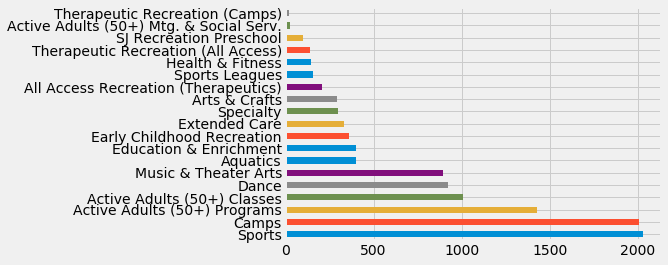

In [225]:
# Checking out all the different categories of activies, Sports, Camps, and Senior programs have the most activities.
style.use('fivethirtyeight')
df['CategoryName'].value_counts().plot(kind='barh')

In [226]:
# Activity locations are mostly at community centers, spacing is causing some duplication we'll remove that next. 
df['Community Center'].value_counts()

Camden Community Center                1364
Almaden Community Center               1340
Evergreen Community Center              967
Willow Glen Community Center            814
Southside Community Center              637
Berryessa Community Center              576
Emma Prusch Farm Park                   445
Mayfair Community Center                427
Cypress Community & Senior Center       418
Seven Trees Community Center            405
Almaden                                 400
Roosevelt Community Center              393
Camden                                  330
Almaden                                 199
Bascom Community Center                 180
Happy Hollow Park & Zoo                 178
Camden                                  163
Evergreen                               153
Evergreen                               145
Willow Glen                             134
Berryessa                               121
Berryessa                               107
Southside                       

In [227]:
# Remove spacing at the beginning or end of each string to remove duplicates in our value counting.
df['Community Center'] = df['Community Center'].str.strip()
df['Community Center'].value_counts()

Camden Community Center                1364
Almaden Community Center               1340
Evergreen Community Center              967
Willow Glen Community Center            814
Southside Community Center              637
Almaden                                 599
Berryessa Community Center              576
Camden                                  493
Emma Prusch Farm Park                   445
Mayfair Community Center                427
Cypress Community & Senior Center       418
Seven Trees Community Center            405
Roosevelt Community Center              393
Evergreen                               298
Willow Glen                             229
Berryessa                               228
Southside                               201
Bascom Community Center                 180
Happy Hollow Park & Zoo                 178
Cypress                                 152
Seven Trees                             130
Emma Prusch                             110
Roosevelt                       

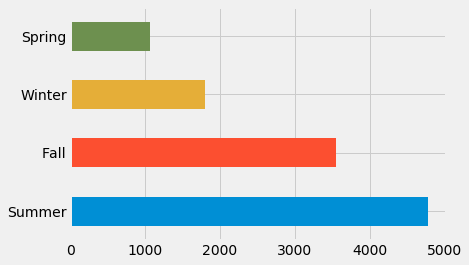

In [228]:
# Activities mostly take place in Summer and Fall. 
df['SeasonName'].value_counts().plot(kind='barh')

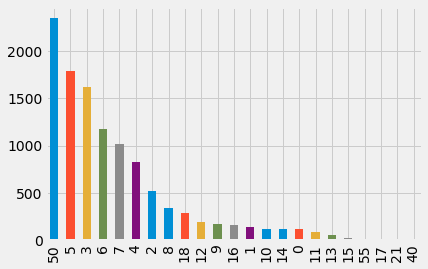

In [229]:
# Age groups for activities seem to be for seniors and young children. 
df['Minimum Age'].value_counts().plot(kind='bar')

In [230]:
# Activities are divided by the 4 seasons each year. 
df.SeasonName.unique()

array(['Fall', 'Summer', 'Spring', 'Winter'], dtype=object)

In [231]:
# Adding a revenue category to show how much money the city generates per activity
df['Revenue'] = df['NumberEnrolled'] * df['Fee']

In [232]:
df.head()

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,EndingTime,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Year,Revenue
0,251.2.0707,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-08-06,2015-08-31,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,259.0
1,251.2.1800,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,13,2015-09-03,2015-10-01,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,481.0
2,251.2.1801,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,9,2015-10-05,2015-11-05,13:30:00,14:30:00,50,0,M Th,9.0,9,37.0,2015,333.0
3,251.2.1802,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-11-09,2015-12-07,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,259.0
4,251.2.1814,Bridge Intermediate Class,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,17,2015-09-01,2015-10-20,13:00:00,15:00:00,50,0,Tu,16.0,8,36.0,2015,612.0


# Data analysis of activities with low attendance

In [233]:
# Activities with 1 or less enrolled will be considered "low attendance".

In [234]:
df.corr()

,NumberEnrolled,Minimum Age,Maximum Age,NumberOfHours,NumberOfDates,Fee,Revenue
NumberEnrolled,1.000000,0.167101,-0.015400,0.373995,0.264073,0.008172,0.730469
Minimum Age,0.167101,1.000000,0.164224,0.141772,0.237863,-0.420244,-0.178008
Maximum Age,-0.015400,0.164224,1.000000,0.048281,0.024581,-0.103678,-0.068089
NumberOfHours,0.373995,0.141772,0.048281,1.000000,0.618723,0.356604,0.524314
NumberOfDates,0.264073,0.237863,0.024581,0.618723,1.000000,0.155666,0.198311
Fee,0.008172,-0.420244,-0.103678,0.356604,0.155666,1.000000,0.448808
Revenue,0.730469,-0.178008,-0.068089,0.524314,0.198311,0.448808,1.000000


In [235]:
# Copying the data frame for analysis
df_copy = df.copy()

In [236]:
df_copy.head()

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,EndingTime,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Year,Revenue
0,251.2.0707,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-08-06,2015-08-31,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,259.0
1,251.2.1800,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,13,2015-09-03,2015-10-01,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,481.0
2,251.2.1801,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,9,2015-10-05,2015-11-05,13:30:00,14:30:00,50,0,M Th,9.0,9,37.0,2015,333.0
3,251.2.1802,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-11-09,2015-12-07,13:30:00,14:30:00,50,0,M Th,8.0,8,37.0,2015,259.0
4,251.2.1814,Bridge Intermediate Class,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,17,2015-09-01,2015-10-20,13:00:00,15:00:00,50,0,Tu,16.0,8,36.0,2015,612.0


In [237]:
df_copy.shape

(11174, 19)

In [238]:
# Group each activity by avg enrollment and revenue.
avg_enrolled = df_copy.groupby('CategoryName')['NumberEnrolled'].mean().sort_values(ascending=False)
avg_revenue = df_copy.groupby('CategoryName')['Revenue'].mean().sort_values(ascending=False)

In [239]:
X = avg_enrolled
Y = avg_revenue

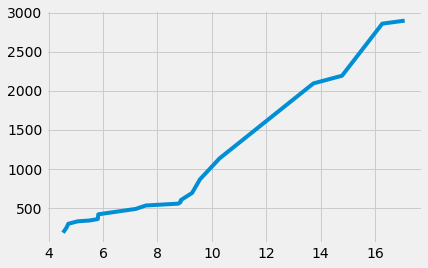

In [240]:
# Once enrollment gets around 10 the revenue jumps, more popular acitvities can probably charge more fees.
plt.plot(X,Y)

In [241]:
# Group by average enrollment per year to see if there are any meaningful differences between years. 
avg_yearly_enrollment = df_copy.groupby('Year')['NumberEnrolled'].mean()

([<matplotlib.axis.YTick at 0x1a22100ba8>,
 <a list of 6 Text yticklabel objects>)

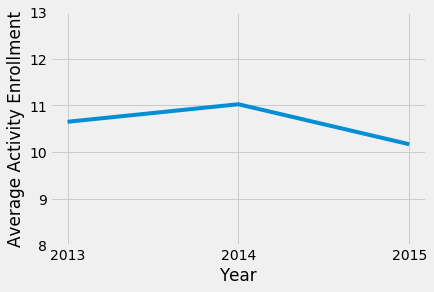

In [242]:
# Average enrollment seems steady over three years between 10-11. 
age_plot = plt.plot(avg_yearly_enrollment)
plt.xlabel("Year")
plt.ylabel("Average Activity Enrollment")
plt.yticks(range(8,14))

In [243]:
# Setting the target for low attendance for activities with less than 1 person enrolled. 
low_attendance = df_copy['NumberEnrolled'] <= 1

In [244]:
df_low = df_copy[low_attendance]

In [245]:
# About 1/4th of activities meet the low enrollment threshold.
df_low.shape

(2855, 19)

In [246]:
df_copy.shape

(11174, 19)

In [247]:
df_low.head()

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,EndingTime,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Year,Revenue
7,251.2.1893,Dance Fit,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,0,2015-10-01,2015-11-03,08:00:00,09:00:00,50,0,Tu Th,0.0,0,51.0,2015,0.0
8,251.2.1894,Dance Fit,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,1,2015-11-05,2015-12-01,08:00:00,09:00:00,50,0,Tu Th,0.0,0,40.0,2015,40.0
12,251.2.1806,Enhance Fitness,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,0,2015-08-25,2015-09-01,09:00:00,10:00:00,55,0,Tu Th,3.0,3,35.0,2015,0.0
41,251.2.0615,Tai Chi for Strength and Balance,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,0,2015-10-06,2015-10-06,11:30:00,12:30:00,50,0,Tu,1.0,1,43.0,2015,0.0
46,213.2.1946,Hula - Beg,Fall,Cancelled,Active Adults (50+) Classes,Berryessa Community Center,0,2015-10-23,2015-12-04,09:00:00,10:30:00,50,99,F,9.0,6,13.0,2015,0.0


Text(0.5,0,'Number of Low Attendance Classes')

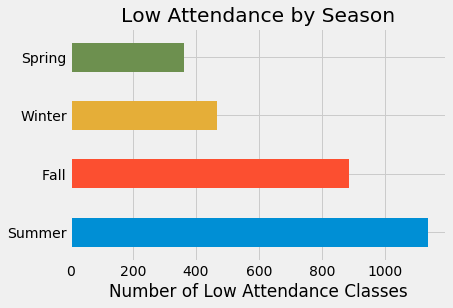

In [248]:
# Seasons with low enrollment are also the seasons with the most activities. 
low_seasons = df_low['SeasonName'].value_counts().plot(kind='barh', title="Low Attendance by Season")
low_seasons.set_xlabel("Number of Low Attendance Classes")

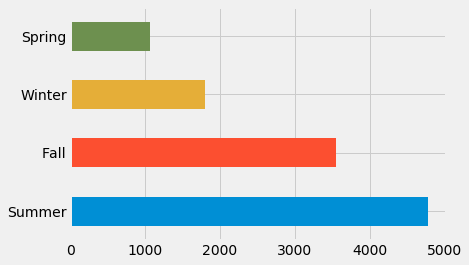

In [249]:
# Total activities for each season.
df['SeasonName'].value_counts().plot(kind='barh')

Text(0.5,0,'Number of Low Attendance Classes')

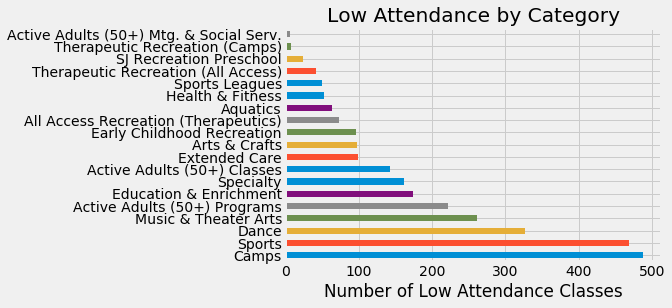

In [250]:
# Activities that are offered the most, Camps and Sports, also have the highest number of low attendance. 
low_cat = df_low['CategoryName'].value_counts().plot(kind='barh', title="Low Attendance by Category")
low_cat.set_xlabel("Number of Low Attendance Classes")

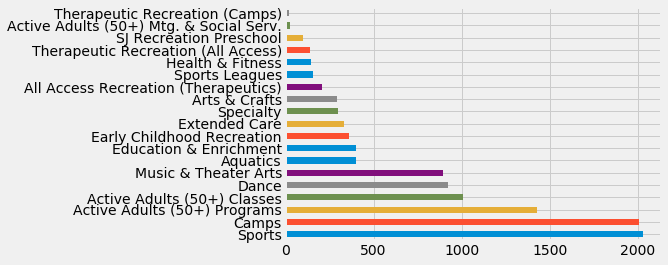

In [251]:
# Total activities for each category.
df['CategoryName'].value_counts().plot(kind='barh',)

In [252]:
# Most activities with low attendance do get cancelled.
df_low.Status.value_counts()

Cancelled    2255
Closed        595
cancelled       5
Name: Status, dtype: int64

In [253]:
df_low['Minimum Age'].unique()

array([50, 55, 18,  7,  3,  6,  8, 13,  5,  1,  2,  4, 16,  0, 11, 14, 12,
       15, 10,  9, 17, 21])

In [254]:
# Looking at activity by age groups.
Senior = df['Minimum Age'] >= 50
Child = df['Minimum Age'] < 18
Adult = df['Minimum Age'].between(17, 51, inclusive=True)

In [255]:
# Adding age groups based on the minimum age for an activity.
bins = [-1, 12, 17, 49, np.inf]
names = ['Children', 'Teens', 'Adults', 'Seniors']

df['AgeRange'] = pd.cut(df['Minimum Age'], bins, labels=names)

In [256]:
# Most activities are for Children and Seniors .
df.AgeRange.value_counts()

Children    8136
Seniors     2364
Teens        378
Adults       296
Name: AgeRange, dtype: int64

In [257]:
# Creating attendance feature based on enrollment
bins = [-1, 1, 12, np.inf]
names = ['low', 'normal', 'high']

df['Enrollment'] = pd.cut(df['NumberEnrolled'], bins, labels=names)

In [258]:
df.head(10)

,ActivityNumber,ActivityName,SeasonName,Status,CategoryName,Community Center,NumberEnrolled,BeginningDate,EndingDate,StartingTime,...,Minimum Age,Maximum Age,WeekDays,NumberOfHours,NumberOfDates,Fee,Year,Revenue,AgeRange,Enrollment
0,251.2.0707,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-08-06,2015-08-31,13:30:00,...,50,0,M Th,8.0,8,37.0,2015,259.0,Seniors,normal
1,251.2.1800,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,13,2015-09-03,2015-10-01,13:30:00,...,50,0,M Th,8.0,8,37.0,2015,481.0,Seniors,high
2,251.2.1801,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,9,2015-10-05,2015-11-05,13:30:00,...,50,0,M Th,9.0,9,37.0,2015,333.0,Seniors,normal
3,251.2.1802,Arthritis Exercise Program,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,7,2015-11-09,2015-12-07,13:30:00,...,50,0,M Th,8.0,8,37.0,2015,259.0,Seniors,normal
4,251.2.1814,Bridge Intermediate Class,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,17,2015-09-01,2015-10-20,13:00:00,...,50,0,Tu,16.0,8,36.0,2015,612.0,Seniors,high
5,251.2.1815,Bridge Intermediate Class,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,14,2015-10-27,2015-12-15,13:00:00,...,50,0,Tu,13.5,6,27.0,2015,378.0,Seniors,high
6,251.2.1892,Dance Fit,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,41,2015-08-27,2015-09-29,08:00:00,...,50,0,Tu Th,10.0,10,51.0,2015,2091.0,Seniors,high
7,251.2.1893,Dance Fit,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,0,2015-10-01,2015-11-03,08:00:00,...,50,0,Tu Th,0.0,0,51.0,2015,0.0,Seniors,low
8,251.2.1894,Dance Fit,Fall,Cancelled,Active Adults (50+) Classes,Almaden Community Center,1,2015-11-05,2015-12-01,08:00:00,...,50,0,Tu Th,0.0,0,40.0,2015,40.0,Seniors,low
9,251.2.0601,Enhance Fitness,Fall,Closed,Active Adults (50+) Classes,Almaden Community Center,15,2015-09-22,2015-10-15,09:00:00,...,50,0,Tu Th,8.0,8,34.0,2015,510.0,Seniors,high


In [259]:
df.Enrollment.value_counts()

normal    5111
high      3208
low       2855
Name: Enrollment, dtype: int64

# Classification model to predict low enrollment for an activitiy 

In [260]:
# Conversion to a Classification Task...
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [261]:
clean_data = df.copy()

In [262]:
# Creating a categorical feature for activities that are "low attendance".
clean_data['enrollment_label'] = (clean_data['NumberEnrolled'] < 2)*1
print(clean_data['enrollment_label'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4013    1
4014    0
4015    0
4016    0
4017    0
4018    0
4019    1
4020    0
4021    1
4022    1
4023    1
4024    1
4025    1
4026    1
4027    0
4028    0
4029    0
4030    0
4031    0
4032    0
4033    0
4034    0
4035    0
4036    0
4037    0
4038    1
4039    0
4040    0
4041    1
4042    0
Name: enrollment_label, Length: 11174, dtype: int64


In [263]:
# Creating a target variable for the model. 
y=clean_data[['enrollment_label']].copy()

In [264]:
clean_data['NumberEnrolled'].head(10)

0     7
1    13
2     9
3     7
4    17
5    14
6    41
7     0
8     1
9    15
Name: NumberEnrolled, dtype: int64

In [265]:
y.head(10)

,enrollment_label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [266]:
clean_data.describe()

,NumberEnrolled,Minimum Age,Maximum Age,NumberOfHours,NumberOfDates,Fee,Revenue,enrollment_label
count,11174.000000,11174.000000,11174.000000,11174.000000,11174.000000,11174.000000,11174.00000,11174.000000
mean,10.558529,15.269733,14.001790,12.618832,6.468140,101.568597,1081.95503,0.255504
std,13.224542,18.319550,24.437962,16.196442,5.124566,88.282225,1972.91255,0.436164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,4.000000,3.000000,4.000000,4.000000,37.000000,40.00000,0.000000
50%,7.000000,6.000000,8.000000,6.750000,6.000000,90.000000,450.00000,0.000000
75%,14.000000,16.000000,12.000000,15.000000,8.000000,131.000000,1089.00000,1.000000
max,165.000000,55.000000,100.000000,167.883000,60.000000,921.000000,38472.00000,1.000000


In [267]:
clean_data.columns

Index(['ActivityNumber', 'ActivityName', 'SeasonName', 'Status',
       'CategoryName', 'Community Center', 'NumberEnrolled', 'BeginningDate',
       'EndingDate', 'StartingTime', 'EndingTime', 'Minimum Age',
       'Maximum Age', 'WeekDays', 'NumberOfHours', 'NumberOfDates', 'Fee',
       'Year', 'Revenue', 'AgeRange', 'Enrollment', 'enrollment_label'],
      dtype='object')

In [268]:
# Converting the data types so they can be used in the model. 
clean_data['BeginningDate'] = clean_data['BeginningDate'].astype(np.int64)
clean_data['EndingDate'] = clean_data['EndingDate'].astype(np.int64)
clean_data['NumberOfHours'] = clean_data['NumberOfHours'].astype(np.int64)
#clean_data['StartingTime'] = clean_data['StartingTime'].astype(np.int64)
#clean_data['EndingTime'] = clean_data['EndingTime'].astype(np.int64)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11174 entries, 0 to 4042
Data columns (total 22 columns):
ActivityNumber      11174 non-null object
ActivityName        11174 non-null object
SeasonName          11174 non-null object
Status              11174 non-null object
CategoryName        11174 non-null object
Community Center    11174 non-null object
NumberEnrolled      11174 non-null int64
BeginningDate       11174 non-null int64
EndingDate          11174 non-null int64
StartingTime        11174 non-null object
EndingTime          11174 non-null object
Minimum Age         11174 non-null int64
Maximum Age         11174 non-null int64
WeekDays            11174 non-null object
NumberOfHours       11174 non-null int64
NumberOfDates       11174 non-null int64
Fee                 11174 non-null float64
Year                11174 non-null object
Revenue             11174 non-null float64
AgeRange            11174 non-null category
Enrollment          11174 non-null category
enrollment_

In [269]:
# Enrollment features that will be used in the model. 
enrollment_features = ['BeginningDate','EndingDate','Minimum Age','Maximum Age',
                       'NumberOfHours','NumberOfDates','Fee']

In [270]:
X = clean_data[enrollment_features].copy()

In [271]:
X.columns

Index(['BeginningDate', 'EndingDate', 'Minimum Age', 'Maximum Age',
       'NumberOfHours', 'NumberOfDates', 'Fee'],
      dtype='object')

In [272]:
y.columns

Index(['enrollment_label'], dtype='object')

# Train the model

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=456)

In [274]:
# Creating the classifier then fitting it to our training data.
enrollment_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
enrollment_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [275]:
type(enrollment_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [276]:
# Using testing data to get the model predictions. 
predictions = enrollment_classifier.predict(X_test)

In [277]:
predictions[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [278]:
y_test['enrollment_label'][:10]

2603    1
608     0
1105    0
965     0
1098    0
578     0
3811    0
2893    0
1038    0
3338    0
Name: enrollment_label, dtype: int64

In [279]:
# How well does our model predict the target, 88.6% prediction accuracy. 
accuracy_score(y_true = y_test, y_pred = predictions)

0.886117136659436

In [280]:
enrollment_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [281]:
# Creating a graph of the classification tree.
from sklearn import tree
tree.export_graphviz(enrollment_classifier, out_file='tree.dot')

# Proportion of activities with low attendance

In [282]:
clean_data.shape

(11174, 22)

In [283]:
clean_data.columns

Index(['ActivityNumber', 'ActivityName', 'SeasonName', 'Status',
       'CategoryName', 'Community Center', 'NumberEnrolled', 'BeginningDate',
       'EndingDate', 'StartingTime', 'EndingTime', 'Minimum Age',
       'Maximum Age', 'WeekDays', 'NumberOfHours', 'NumberOfDates', 'Fee',
       'Year', 'Revenue', 'AgeRange', 'Enrollment', 'enrollment_label'],
      dtype='object')

In [284]:
# Checking proportion of low attendance activities by community center.
community_centers = clean_data['Community Center'].unique().tolist()

In [285]:
print(community_centers)

['Almaden Community Center', 'Berryessa Community Center', 'Camden Community Center', 'Cypress Community & Senior Center', 'Evergreen Community Center', 'Mayfair Community Center', 'Seven Trees Community Center', 'Southside Community Center', 'Willow Glen Community Center', 'Roosevelt Community Center', 'Emma Prusch Farm Park', 'Happy Hollow Park & Zoo', 'Almaden Lake Park', 'Bascom Community Center', 'Lake Cunningham Regional Skate Park', 'Therapeutic Services', 'Calabazas Park', 'Kirk Community Center', 'Alum Rock Community Center', 'Almaden', 'Berryessa', 'Camden', 'Cypress', 'Evergreen', 'Mayfair', 'Seven Trees', 'Southside', 'Willow Glen', 'Gardner', 'Roosevelt', 'Emma Prusch', 'Almaden Lake', 'Cunningham Skate', 'Happy Hollow', 'Bascom', 'Alum Rock', 'Hank Lopez Community Center', 'Alviso Community Center']


In [286]:
centers = pd.DataFrame(columns=['Community Center', 'total activities', 
                                'total low attendance','% low attendance', ])

for i in community_centers:
    
    center = i
    
    center_df = clean_data.loc[clean_data['Community Center'].str.contains(center)]
    total_centers = len(center_df.index)
    low_attend = center_df['enrollment_label'].isin([1]).sum()
    
    proportion_low = (low_attend/total_centers)*100
    
    centers = centers.append({'Community Center':i, 
                              'total activities': total_centers, 
                              'total low attendance': low_attend, 
                              '% low attendance': proportion_low }, ignore_index=True)
    

In [287]:
centers.sort_values(by='% low attendance', ascending=False).head(5)

,Community Center,total activities,total low attendance,% low attendance
36,Hank Lopez Community Center,5,3,60.000000
31,Almaden Lake,118,66,55.932203
12,Almaden Lake Park,87,47,54.022989
9,Roosevelt Community Center,393,204,51.908397
34,Bascom,263,132,50.190114


In [288]:
# Checking proportion of low attendance activities by season. 
seasonNames = clean_data['SeasonName'].unique().tolist()

In [289]:
seasonNames

['Fall', 'Summer', 'Spring', 'Winter']

In [290]:
seasons = pd.DataFrame(columns=['Season', 'total activities', 
                                'total low attendance','% low attendance'])

for i in seasonNames:
    
    season = i
    
    season_df = clean_data.loc[clean_data['SeasonName'].str.contains(season)]
    total_seasons = len(season_df.index)
    low_attend = season_df['enrollment_label'].isin([1]).sum()
    
    proportion_low = (low_attend/total_seasons)*100
    
    seasons = seasons.append({'Season':i, 
                              'total activities': total_seasons, 
                              'total low attendance': low_attend, 
                              '% low attendance': proportion_low, }, ignore_index=True)
    

In [291]:
seasons.sort_values(by='% low attendance', ascending=False).head(5)

,Season,total activities,total low attendance,% low attendance
2,Spring,1060,363,34.245283
3,Winter,1796,467,26.002227
0,Fall,3541,887,25.049421
1,Summer,4777,1138,23.822483


In [292]:
spring = clean_data.loc[clean_data['SeasonName'].str.contains('Spring 2015')]

In [293]:
spring['enrollment_label'].value_counts()

Series([], Name: enrollment_label, dtype: int64)

In [294]:
# Checking proportion of low attendance activities by age 
ageGroups = clean_data['AgeRange'].unique().tolist()

In [295]:
ageGroups

['Seniors', 'Adults', 'Children', 'Teens']

In [296]:
ages = pd.DataFrame(columns=['Age Groups', 'total activities', 
                                'total low attendance','% low attendance'])

for i in ageGroups:
    
    age = i
    
    age_df = clean_data.loc[clean_data['AgeRange'].str.contains(age)]
    total_ages = len(age_df.index)
    low_attend = age_df['enrollment_label'].isin([1]).sum()
    
    proportion_low = (low_attend/total_ages)*100
    
    ages = ages.append({'Age Groups':i, 
                              'total activities': total_ages, 
                              'total low attendance': low_attend, 
                              '% low attendance': proportion_low, }, ignore_index=True)
    

In [297]:
ages.sort_values(by='% low attendance', ascending=False).head(5)

,Age Groups,total activities,total low attendance,% low attendance
3,Teens,378,145,38.359788
1,Adults,296,95,32.094595
2,Children,8136,2269,27.888397
0,Seniors,2364,346,14.636210
